In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn import linear_model

In [2]:
#Read a file
df = pd.read_excel(r'C:\Users\jthekkel\Desktop\DataSet\AirQualityUCI.xlsx',sheet_name='AirQualityUCI')
print(df)

           Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0    2004-03-10  18:00:00     2.6  1360.000000       150  11.881723   
1    2004-03-10  19:00:00     2.0  1292.250000       112   9.397165   
2    2004-03-10  20:00:00     2.2  1402.000000        88   8.997817   
3    2004-03-10  21:00:00     2.2  1375.500000        80   9.228796   
4    2004-03-10  22:00:00     1.6  1272.250000        51   6.518224   
5    2004-03-10  23:00:00     1.2  1197.000000        38   4.741012   
6    2004-03-11  00:00:00     1.2  1185.000000        31   3.624399   
7    2004-03-11  01:00:00     1.0  1136.250000        31   3.326677   
8    2004-03-11  02:00:00     0.9  1094.000000        24   2.339416   
9    2004-03-11  03:00:00     0.6  1009.750000        19   1.696658   
10   2004-03-11  04:00:00  -200.0  1011.000000        14   1.293620   
11   2004-03-11  05:00:00     0.7  1066.000000         8   1.133431   
12   2004-03-11  06:00:00     0.7  1051.750000        16   1.603768   
13   2

In [3]:
# define the data/predictors as the pre-set feature names  
#df = pd.DataFrame(data.data, columns=data.feature_names)

# Put the target (housing value -- MEDV) in another DataFrame
target = df["T"]
print(target)

0       13.600000
1       13.300000
2       11.900000
3       11.000000
4       11.150000
5       11.175000
6       11.325000
7       10.675000
8       10.650000
9       10.250000
10      10.075000
11      11.000000
12      10.450000
13      10.200000
14      10.750000
15      10.500000
16      10.800000
17      10.500000
18       9.525000
19       8.300000
20       8.000000
21       8.325000
22       9.700000
23       9.775000
24      10.350000
25       9.650000
26       9.650000
27       9.125000
28       8.175000
29       8.250000
          ...    
9327    17.825000
9328    21.125000
9329    24.000000
9330    26.450000
9331    28.675000
9332    28.475000
9333    30.000000
9334    29.425000
9335    28.875000
9336    22.800001
9337    19.925000
9338    17.500000
9339    16.450000
9340    15.525000
9341    14.275000
9342    14.175000
9343    13.850000
9344    12.100000
9345    11.325000
9346    11.825000
9347    10.400000
9348     9.550000
9349     9.675000
9350    13.550000
9351    18

In [4]:
X = df[["AH","RH"]]
y = target
X = sm.add_constant(X)
#print(X)
#print(y)

In [5]:
# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      T   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 2.001e+05
Date:                Mon, 04 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:10:32   Log-Likelihood:                -30832.
No. Observations:                9357   AIC:                         6.167e+04
Df Residuals:                    9354   BIC:                         6.169e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.1332      0.203    157.907      0.000      31.734      32.532
AH             1.4733      0.005    280.671      0.000       1.463       1.484
RH            -0.3111      0.004    -77.876      0.000      -0.319      -0.303
==============================================================================
Omnibus:                      495.421   Durbin-Watson:                   0.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              577.228
Skew:                          -0.607   Prob(JB):                    4.53e-126
Kurtosis:                       2.927   Cond. No.                         212.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

In [7]:
predictions = lm.predict(X)
print(predictions [0:5])

[18.04498905 18.36298428 16.44735466 14.62676742 14.76204768]


In [8]:
lm.score(X,y)
#This is R2

0.9771629295719321

In [9]:
lm.coef_
#coefficients for the predictors

array([ 0.        ,  1.47326376, -0.31109085])

In [10]:
lm.intercept_

32.133183576062905

In [11]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [12]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(7485, 3) (7485,)
(1872, 3) (1872,)


In [13]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [14]:
predictions[0:5]

array([15.17563138,  9.94124472, 27.39551096,  9.57746761, 24.44632457])

Text(0,0.5,'Predictions')

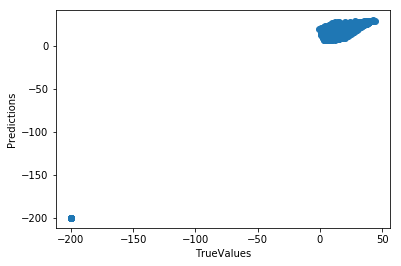

In [15]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('TrueValues')
plt.ylabel('Predictions')

In [16]:
print (model.score(X_test, y_test))

0.97913021079475


In [17]:
#CrossValidation
# Necessary imports: 
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

C:\Users\jthekkel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [18]:
# Perform 6-fold cross validation
scores = cross_val_score(model, X, y, cv=6)
print (scores)

[0.98615976 0.9768237  0.96238558 0.2928374  0.98382107 0.95233819]


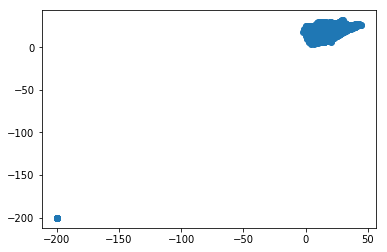

In [19]:
# Make cross validated predictions
predictions = cross_val_predict(model, X, y, cv=6)
plt.scatter(y, predictions)

In [20]:
accuracy = metrics.r2_score(y, predictions)
print (accuracy)

0.969887536615289
